## _Importing the required libraries here_

In [128]:
import numpy as np  
import pandas as pd

import matplotlib.pyplot as plt
import plotly.express as px

from sklearn.model_selection import train_test_split

from sklearn. preprocessing import StandardScaler  
from sklearn.model_selection import train_test_split  
from sklearn.model_selection import cross_val_score  
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score  
from sklearn.metrics import precision_score, recall_score, f1_score

import pickle

## _Reading the Dataset here_

In [129]:
dataframe = pd.read_csv("../Datasets/collegePlacementData.csv")

## _Understanding the Dataset here_

In [130]:
dataframe.sample(10)

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
2423,21,Male,Electrical,0,7,0,0,0
585,22,Female,Electronics And Communication,0,8,0,0,1
1342,25,Male,Electronics And Communication,1,6,0,0,1
1473,21,Male,Electronics And Communication,0,6,0,0,0
435,21,Male,Mechanical,0,6,1,1,0
1993,22,Male,Information Technology,1,7,1,0,0
322,21,Male,Computer Science,2,8,0,0,1
2905,23,Male,Information Technology,1,8,1,0,1
1565,22,Male,Electronics And Communication,1,7,0,0,0
1194,22,Male,Information Technology,1,8,0,0,1


In [131]:
dataframe.shape

(2966, 8)

In [132]:
dataframe.sample(4)

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
1865,21,Male,Civil,0,7,1,0,0
2033,21,Male,Information Technology,0,6,0,1,0
1752,20,Male,Mechanical,0,6,1,1,0
2624,21,Male,Information Technology,1,7,0,0,0


In [133]:
dataframe.dtypes

Age                   int64
Gender               object
Stream               object
Internships           int64
CGPA                  int64
Hostel                int64
HistoryOfBacklogs     int64
PlacedOrNot           int64
dtype: object

In [134]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2966 entries, 0 to 2965
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Age                2966 non-null   int64 
 1   Gender             2966 non-null   object
 2   Stream             2966 non-null   object
 3   Internships        2966 non-null   int64 
 4   CGPA               2966 non-null   int64 
 5   Hostel             2966 non-null   int64 
 6   HistoryOfBacklogs  2966 non-null   int64 
 7   PlacedOrNot        2966 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 185.5+ KB


In [135]:
dataframe.describe()

,Age,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
count,2966.000000,2966.000000,2966.000000,2966.000000,2966.000000,2966.000000
mean,21.485840,0.703641,7.073837,0.269049,0.192178,0.552596
std,1.324933,0.740197,0.967748,0.443540,0.394079,0.497310
min,19.000000,0.000000,5.000000,0.000000,0.000000,0.000000
25%,21.000000,0.000000,6.000000,0.000000,0.000000,0.000000
50%,21.000000,1.000000,7.000000,0.000000,0.000000,1.000000
75%,22.000000,1.000000,8.000000,1.000000,0.000000,1.000000
max,30.000000,3.000000,9.000000,1.000000,1.000000,1.000000


#### _Checking the Correlation of the `PlacedOrNot` target variable with all columns_

In [136]:
numeric_cols = dataframe.select_dtypes(include=[np.number]).columns  # Select numeric columns
correlation = dataframe[numeric_cols].corr()['PlacedOrNot']

In [137]:
correlation

Age                  0.046943
Internships          0.179334
CGPA                 0.588648
Hostel              -0.038182
HistoryOfBacklogs   -0.022337
PlacedOrNot          1.000000
Name: PlacedOrNot, dtype: float64

#### `Inference` PlacedOrNot is highly correlated with the CGPA of the students

## _Data Preprocessing_

#### _Checking for the `Null` values here_

In [138]:
dataframe.isnull().sum()

Age                  0
Gender               0
Stream               0
Internships          0
CGPA                 0
Hostel               0
HistoryOfBacklogs    0
PlacedOrNot          0
dtype: int64

#### _Checking for the duplicate entries in the dataframe here_

In [139]:
dataframe.duplicated().sum()

1829

#### _Dropping the Duplicate values here_

In [140]:
dataframe.drop_duplicates(inplace=True)

In [141]:
dataframe.duplicated().sum()

0

## _`EDA` Exploratory Data Analysis_

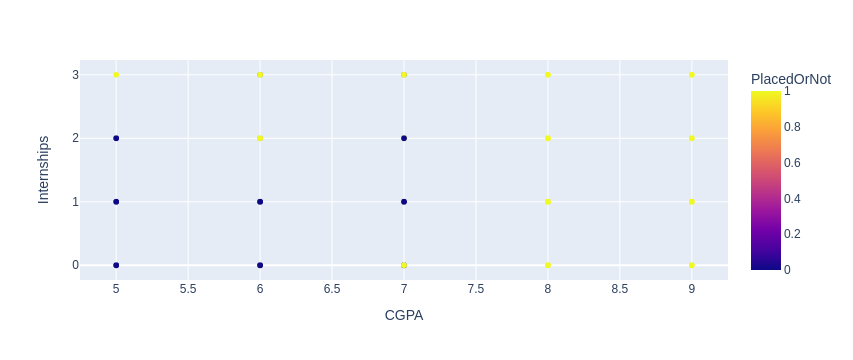

In [142]:
# Plotting  the graph so that we can visualize the output with respect to major features  
figure = px.scatter(dataframe, x="CGPA", y="Internships", color="PlacedOrNot",  hover_data=['CGPA'])
figure.show()

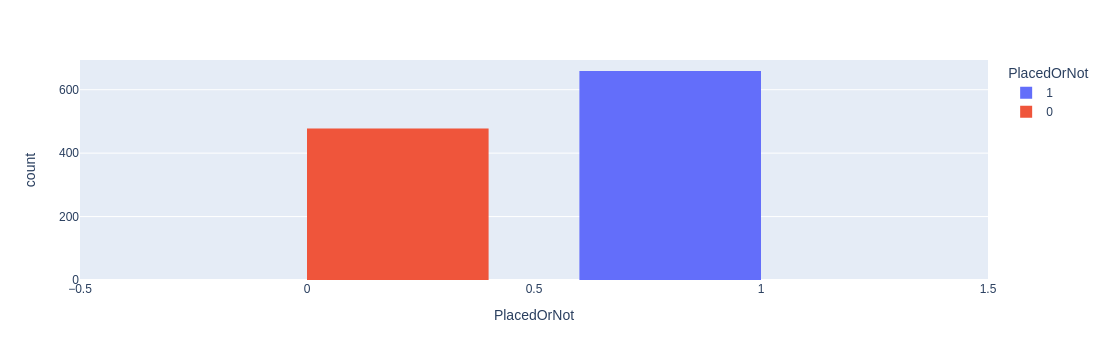

In [143]:
# Plotting Histogram for the count of place and not placed  
px.histogram(dataframe, x='PlacedOrNot', color='PlacedOrNot', barmode='group')

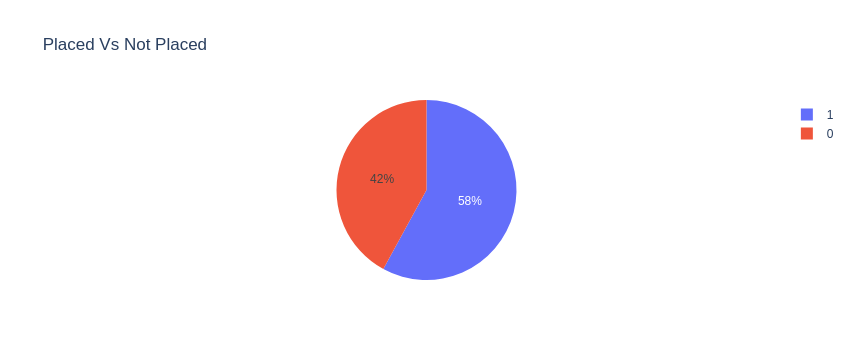

In [144]:
# Pie Chart: Percentage pie chart of Placed or Not Placed  
figure = px.pie(dataframe, values=dataframe['PlacedOrNot'].value_counts().values, names=dataframe['PlacedOrNot'].value_counts().index, title='Placed Vs Not Placed')  
figure.show()

In [145]:
# Printing the Age of the youngest and Eldest student who is placed  
print("Max Age of Placed Person: ",dataframe[(dataframe['Age'] == dataframe['Age'].max()) & (dataframe['PlacedOrNot']==1)]['Age'].values[0])  
print("Min Age of Placed Person: ",dataframe[(dataframe['Age'] == dataframe['Age'].min()) & (dataframe['PlacedOrNot']==1)]['Age'].values[0])

Max Age of Placed Person:  30
Min Age of Placed Person:  19


In [146]:
# Printing the Maximum and the Minimum number of internships done by the student who is placed.   
# We will also print the Maximum and Minimum number of students who did the max internship and the minimum number of internships.  
print("Max Internships Done by the Placed Student: ",dataframe[(dataframe['Internships'] == dataframe['Internships'].max()) & (dataframe['PlacedOrNot']==1)]['Internships'].values[0])  
print("No of students who did max Internships and are placed: ",dataframe[(dataframe['Internships'] == dataframe['Internships'].max()) & (dataframe['PlacedOrNot']==1)]['Internships'].value_counts().values[0])  
  
print("Min Internships Done by the Placed Person: ",dataframe[(dataframe['Internships'] == dataframe['Internships'].min()) & (dataframe['PlacedOrNot']==1)]['Internships'].values[0])  
print("No of students who did min Internships and are placed: ",dataframe[(dataframe['Internships'] == dataframe['Internships'].min()) & (dataframe['PlacedOrNot']==1)]['Internships'].value_counts().values[0])

Max Internships Done by the Placed Student:  3
No of students who did max Internships and are placed:  35
Min Internships Done by the Placed Person:  0
No of students who did min Internships and are placed:  232


In [147]:
# Printing the Maximum and Minimum number of CGPA obtained by the student who is placed.  
# We will also print the Maximum and the Minimum number of students who got the max CGPA and minimum CGPA who are placed.  
  
print("Max CGPA of Placed Student: ",dataframe[(dataframe['CGPA'] == dataframe['CGPA'].max()) & (dataframe['PlacedOrNot']==1)]['CGPA'].values[0])  
print("No of students has max CGPA and are placed: ",dataframe[(dataframe['CGPA'] == dataframe['CGPA'].max()) & (dataframe['PlacedOrNot']==1)]['CGPA'].value_counts().values[0])  
  
print("Min CGPA of Placed Person: ",dataframe[(dataframe['CGPA'] == dataframe['CGPA'].min()) & (dataframe['PlacedOrNot']==1)]['CGPA'].values[0])  
print("No of students has min CGPA and are placed: ",dataframe[(dataframe['CGPA'] == dataframe['CGPA'].min()) & (dataframe['PlacedOrNot']==1)]['CGPA'].value_counts().values[0])

Max CGPA of Placed Student:  9
No of students has max CGPA and are placed:  99
Min CGPA of Placed Person:  5
No of students has min CGPA and are placed:  5


## 5. _Representation_

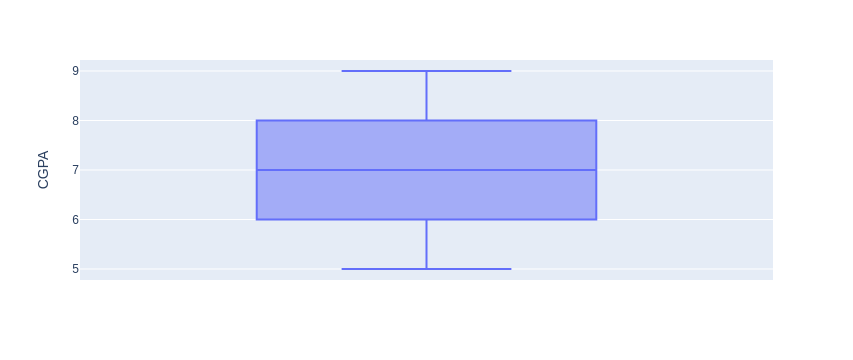

In [148]:
figure = px.box(dataframe, y='CGPA')  
figure.show()  

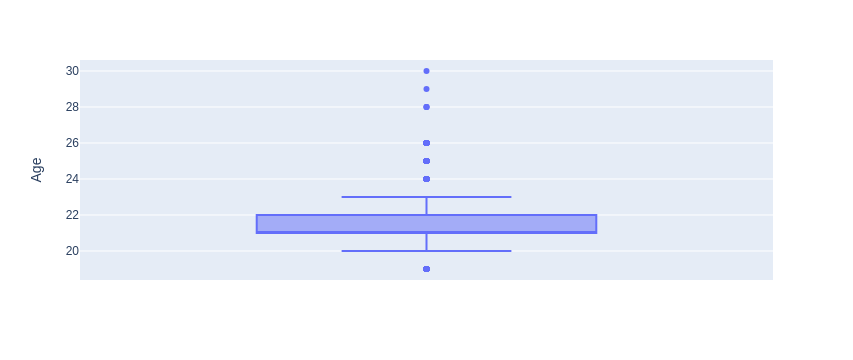

In [149]:
figure = px.box(dataframe, y='Age')  
figure.show()  

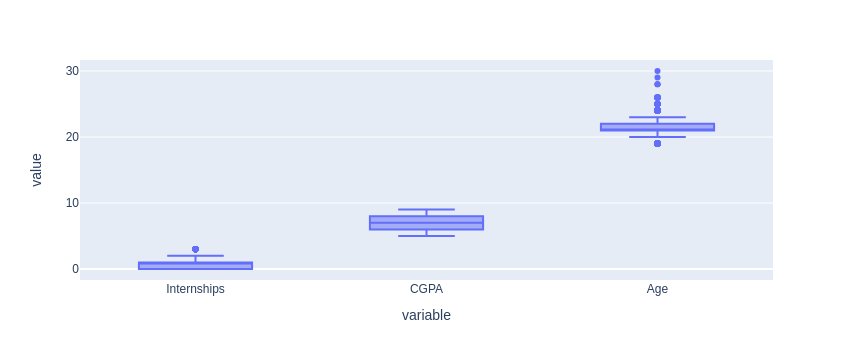

In [150]:
figure = px.box(dataframe, y=['Internships', 'CGPA', 'Age'])  
figure.show()

## 6. _Encoding Categorical to Numerical_

In [151]:
# Converting Gender column  
dataframe['Gender'] = dataframe['Gender'].map({'Male': 1, 'Female': 0})

In [152]:
dataframe['Stream'].unique()

array(['Electronics And Communication', 'Computer Science',
       'Information Technology', 'Mechanical', 'Electrical', 'Civil'],
      dtype=object)

In [153]:
# Converting Stream column  
dataframe['Stream'] = dataframe['Stream'].map({'Electronics And Communication': 1,  
                                 'Computer Science': 2,  
                                'Information Technology': 3,  
                                'Mechanical':4,  
                                'Electrical':5,  
                                'Civil':6})

In [154]:
dataframe.sample(5)

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
1676,23,0,4,1,6,1,0,0
1228,22,1,4,0,9,1,1,1
619,21,1,6,2,8,1,1,1
1012,21,1,2,1,6,0,1,0
782,21,0,3,2,8,0,0,1


## 7. _Extracting `Input` and `Output` Columns_

In [155]:
X = dataframe.iloc[:, 0:7]
y = dataframe.iloc[:, -1]
X

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs
0,22,1,1,1,8,1,1
1,21,0,2,0,7,1,1
2,22,0,3,1,6,0,0
3,21,1,3,0,8,0,1
4,22,1,4,0,8,1,0
...,...,...,...,...,...,...,...
2946,23,1,3,1,7,1,1
2952,23,1,4,0,8,1,0
2954,23,0,2,1,8,0,1
2958,23,1,2,0,6,0,1


In [156]:
print(X.shape)
print(y.shape)

(1137, 7)
(1137,)


In [157]:
# Splitting the dataset into training and testing datasets.  
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33)

In [158]:
# Getting the Shape of all the training and testing dataset  
print(X_train.shape)  
print(X_test.shape)  
print(y_train.shape)  
print(y_test.shape)

(761, 7)
(376, 7)
(761,)
(376,)


## 9. _Scaling the Values_

In [159]:
scaler = StandardScaler()  
X_train_scale = scaler.fit_transform(X_train)  
X_test_scale = scaler.transform(X_test)

## 10. _Training & Evaluating the Model_

* Logistic Regression

In [160]:
from sklearn.linear_model import LogisticRegression  
classifier = LogisticRegression()  
  
# Without Scaling  
classifier.fit(X_train,y_train)  
y_pred = classifier.predict(X_test)  
print("Without Scaling and CV: ",accuracy_score(y_test,y_pred))  
scores = cross_val_score(classifier, X_train, y_train, cv=10)  
print("Without Scaling and With CV: ",scores.mean())  
  
# With Scaling  
classifier.fit(X_train_scale,y_train)  
y_pred = classifier.predict(X_test_scale)  
print("With Scaling and Without CV: ",accuracy_score(y_test,y_pred))  
scores = cross_val_score(classifier, X_train_scale, y_train, cv=10)  
print("With Scaling and With CV: ",scores.mean())

Without Scaling and CV:  0.7127659574468085
Without Scaling and With CV:  0.7108168147641832
With Scaling and Without CV:  0.7154255319148937
With Scaling and With CV:  0.7095010252904991


* Decision Tree Classifier

In [161]:
from sklearn.tree import DecisionTreeClassifier  
classifier = DecisionTreeClassifier(random_state=0)  
  
#without scaling  
classifier.fit(X_train,y_train)  
y_pred = classifier.predict(X_test)  
print("Without Scaling and CV: ",accuracy_score(y_test,y_pred))  
scores = cross_val_score(classifier, X_train, y_train, cv=10)  
print("Without Scaling and With CV: ",scores.mean())  
  
# With Scaling  
classifier.fit(X_train_scale,y_train)  
y_pred = classifier.predict(X_test_scale)  
print("With Scaling and Without CV: ",accuracy_score(y_test,y_pred))  
scores = cross_val_score(classifier, X_train_scale, y_train, cv=10)  
print("With Scaling and With CV: ",scores.mean())

Without Scaling and CV:  0.726063829787234
Without Scaling and With CV:  0.7240088858509911
With Scaling and Without CV:  0.726063829787234
With Scaling and With CV:  0.7266404647983595


## _Random Forest Classifier_

In [162]:
from sklearn.ensemble import RandomForestClassifier  
  
classifier = RandomForestClassifier(max_depth=10, random_state=0)  
  
classifier.fit(X_train,y_train)  
y_pred = classifier.predict(X_test)  
print("Without Scaling and CV: ",accuracy_score(y_test,y_pred))  
scores = cross_val_score(classifier, X_train, y_train, cv=10)  
print("Without Scaling and With CV: ",scores.mean())  
  
# With Scaling  
classifier.fit(X_train_scale,y_train)  
y_pred = classifier.predict(X_test_scale)
print("With Scaling and Without CV: ",accuracy_score(y_test,y_pred))
scores = cross_val_score(classifier, X_train_scale, y_train, cv=10)
print("With Scaling and With CV: ",scores.mean())

Without Scaling and CV:  0.7819148936170213


Without Scaling and With CV:  0.7712918660287083
With Scaling and Without CV:  0.7872340425531915
With Scaling and With CV:  0.7686602870813398


* Support Vector Machine

In [163]:
from sklearn.svm import SVC

svc = SVC()
parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}
classifier = GridSearchCV(svc, parameters)

classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
print("Without Scaling and CV: ",accuracy_score(y_test,y_pred))

scores = cross_val_score(classifier, X_train, y_train, cv=10)
print(f"Without Scaling and with CV : {scores.mean()}")

# with scaling
classifier.fit(X_train_scale, y_train)
y_pred = classifier.predict(X_test_scale)
print(f"With scaling and without CV : {accuracy_score(y_test, y_pred)}")
scores = cross_val_score(classifier, X_train_scale, y_train, cv = 10)
print(f"With Scaling and with CV : {scores.mean()}")

Without Scaling and CV:  0.726063829787234
Without Scaling and with CV : 0.7226418318523582
With scaling and without CV : 0.7952127659574468
With Scaling and with CV : 0.7580656185919344


* _Support Vector Machine - 2_

In [164]:
from sklearn.svm import NuSVC
classifier = NuSVC()

classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
print(f"Without Scaling and CV : {accuracy_score(y_test, y_pred)}")

scores = cross_val_score(classifier, X_train, y_train, cv = 10)
print(f"Without Scaling and with CV : {scores.mean()}")

# with scaling
classifier.fit(X_train_scale, y_train)
y_pred = classifier.predict(X_test_scale)
print(f"With Scaling and without CV : {accuracy_score(y_test, y_pred)}")

scores = cross_val_score(classifier, X_train_scale, y_train, cv = 10)
print(f"With scaling and with CV : {scores.mean()}")

Without Scaling and CV : 0.776595744680851
Without Scaling and with CV : 0.7423786739576214
With Scaling and without CV : 0.7898936170212766
With scaling and with CV : 0.769958988380041


* Naive Bayes

In [165]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()

classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
print("Without Scaling and CV: ",accuracy_score(y_test,y_pred))

scores = cross_val_score(classifier, X_train, y_train, cv=10)
print(f"Without Scaling and CV : {scores.mean()}")

# with scaling
classifier.fit(X_train_scale, y_train)
y_pred = classifier.predict(X_test_scale)
print("With Scaling and Without CV: ",accuracy_score(y_test,y_pred))

scores = cross_val_score(classifier, X_train_scale, y_train, cv=10)
print("With Scaling and With CV: ",scores.mean())

Without Scaling and CV:  0.7553191489361702
Without Scaling and CV : 0.7120813397129186
With Scaling and Without CV:  0.7553191489361702
With Scaling and With CV:  0.7120813397129186


* _Multinomial Naive Bayes_

In [166]:
from sklearn.naive_bayes import MultinomialNB  
classifier = MultinomialNB()  
  
classifier.fit(X_train,y_train)  
y_pred = classifier.predict(X_test)  
print("Without Scaling and CV: ",accuracy_score(y_test,y_pred))  
scores = cross_val_score(classifier, X_train, y_train, cv=10)  
print("Without Scaling and With CV: ",scores.mean()) 

Without Scaling and CV:  0.6675531914893617
Without Scaling and With CV:  0.6149863294600137


* _Bernoulli Naive Bayes_

In [167]:
from sklearn.naive_bayes import BernoulliNB  
classifier = BernoulliNB()  
  
classifier.fit(X_train,y_train)  
y_pred = classifier.predict(X_test)  
print("Without Scaling and CV: ",accuracy_score(y_test,y_pred))  
scores = cross_val_score(classifier, X_train, y_train, cv=10)  
print("Without Scaling and With CV: ",scores.mean())  
  
# With Scaling  
classifier.fit(X_train_scale,y_train)  
y_pred = classifier.predict(X_test_scale)
print("With Scaling and Without CV: ",accuracy_score(y_test,y_pred))

scores = cross_val_score(classifier, X_train_scale, y_train, cv=10)  
print("With Scaling and With CV: ",scores.mean())  

Without Scaling and CV:  0.5877659574468085
Without Scaling and With CV:  0.5664046479835954
With Scaling and Without CV:  0.6702127659574468
With Scaling and With CV:  0.672693096377307


* KNN

In [168]:
from sklearn.neighbors import KNeighborsClassifier  
classifier = KNeighborsClassifier(n_neighbors=3)  
  
classifier.fit(X_train,y_train)  
y_pred = classifier.predict(X_test)  
print("Without Scaling and CV: ",accuracy_score(y_test,y_pred))  
scores = cross_val_score(classifier, X_train, y_train, cv=10)  
print("Without Scaling and With CV: ",scores.mean())  
  
  
# With Scaling  
classifier.fit(X_train_scale,y_train)  
y_pred = classifier.predict(X_test_scale)  
print("With Scaling and Without CV: ",accuracy_score(y_test,y_pred))

scores = cross_val_score(classifier, X_train_scale, y_train, cv=10)
print("With Scaling and With CV: ",scores.mean())

Without Scaling and CV:  0.7686170212765957
Without Scaling and With CV:  0.7437286397812714
With Scaling and Without CV:  0.726063829787234
With Scaling and With CV:  0.6964456596035544


* Logistic Regression CV

In [169]:
from sklearn.linear_model import LogisticRegressionCV  
classifier = LogisticRegressionCV(cv=5, random_state=0)  
  
# Without Scaling  
classifier.fit(X_train,y_train)  
y_pred = classifier.predict(X_test)  
print("Without Scaling and CV: ",accuracy_score(y_test,y_pred))  
scores = cross_val_score(classifier, X_train, y_train, cv=10)  
print("Without Scaling and With CV: ",scores.mean())  
  
# With Scaling  
classifier.fit(X_train_scale,y_train)  
y_pred = classifier.predict(X_test_scale)  
print("With Scaling and Without CV: ",accuracy_score(y_test,y_pred)) 
scores = cross_val_score(classifier, X_train_scale, y_train, cv=10)  
print("With Scaling and With CV: ",scores.mean())  

Without Scaling and CV:  0.7154255319148937
Without Scaling and With CV:  0.7081852358168147
With Scaling and Without CV:  0.7154255319148937
With Scaling and With CV:  0.7055536568694463


## _Selecting the Best Model_

#### `Inference` So the best accuracy among the models is of `Random Forest Classifier`.

In [170]:
classifier = RandomForestClassifier(max_depth=10, random_state=0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
print(f"Without CV : {accuracy_score(y_test, y_pred)}")

scores = cross_val_score(classifier, X_train, y_train, cv = 10)
print(f"With CV : {scores.mean()}")
print("Precision Score: ", precision_score(y_test, y_pred))  
print("Recall Score: ", recall_score(y_test, y_pred))  
print("F1 Score: ", f1_score(y_test, y_pred))

Without CV : 0.7819148936170213
With CV : 0.7712918660287083
Precision Score:  0.8791208791208791
Recall Score:  0.7272727272727273
F1 Score:  0.7960199004975125


## _Tuning the Model_

In [171]:
param_grid = {
    'bootstrap' : [False, True],
    'max_depth' : [5, 8, 10, 20],
    'max_features' : [3, 4, 5, None],
    'min_samples_split' : [2, 10, 12],
    'n_estimators' : [100, 200, 300]
}

rfclassifier = RandomForestClassifier()

classifier = GridSearchCV(estimator=rfclassifier, param_grid=param_grid, cv=5, n_jobs=-1, verbose=1)

classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test) 
print("Accuracy: ",accuracy_score(y_test,y_pred))
print(classifier.best_params_)
print(classifier.best_estimator_)

Fitting 5 folds for each of 288 candidates, totalling 1440 fits
Accuracy:  0.8218085106382979
{'bootstrap': True, 'max_depth': 5, 'max_features': None, 'min_samples_split': 12, 'n_estimators': 200}
RandomForestClassifier(max_depth=5, max_features=None, min_samples_split=12,
                       n_estimators=200)


#### _Checking the accuracy of the model with the best parameters_

In [172]:
classifier = RandomForestClassifier(bootstrap=False, max_depth=5,max_features=None, min_samples_split=2, n_estimators=100, random_state=0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
print(f"Without CV : {accuracy_score(y_test, y_pred)}")

scores = cross_val_score(classifier, X_train, y_train, cv = 10)
print(f"With CV : {scores.mean()}")
print(f"Precison Score : {precision_score(y_test, y_pred)}")
print("Recall Score: ", recall_score(y_test, y_pred))
print("F1 Score: ", f1_score(y_test, y_pred))

Without CV : 0.8111702127659575
With CV : 0.8251879699248119
Precison Score : 0.9408284023668639
Recall Score:  0.7227272727272728
F1 Score:  0.8174807197943444


#### _The `accuracy` of the model without CV is `81.2%`, and with CV is `83%`._
#### _We can say that the accuracy of the model that we created is quite high._

## _Saving the Trained Model here_

In [173]:
pickle.dump(classifier, open('../Models/Placement_Model', 'wb'))

In [177]:
model = pickle.load(open('../Models/Placement_Model', 'rb'))

In [180]:
model.predict(X_test)


array([1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0,